In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing

# Question 1

In [2]:
file = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_1'
file2 = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_2'
file3 = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_3'
file4 = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_4'
file5 = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_5'
testfile = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\test_batch'


In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## actually this is a key:value dict where the value is like a huge array
# we only care about the "labels" and "data" so maybe extract that only
#test = unpickle(file)
#np.vstack(test[b'labels'])
#test[b'labels']

In [4]:
list_to_train = [file, file2,file3,file4, file5]
# instantiate dict
#train_data = np.empty((0,3072), dtype=object)
train_data = []
train_labels = []



# for i, file in enumerate(list_to_train[:-1]):
#     train_data.append(unpickle(i)[b'data'])
#     #train_data = np.concatenate([train_data, unpickle(file)])
    
for i in list_to_train:
     train_data.append(unpickle(i)[b'data'])
    
#np.concatenate( (unpickle(file)[b'data']), axis = 0)
    
    
for j in list_to_train:
    train_labels.append(unpickle(j)[b'labels'])



test_data = unpickle(testfile)[b'data'] #this is the right shape of all your training data (10k, 3072)
test_labels = unpickle(testfile)[b'labels']
#print(test_labels)

#now concat all your train data 1 through 5 (it is no longer a list of arrays, but just one big array)
train_data = np.concatenate([train_data[0], train_data[1], train_data[2], train_data[3], train_data[4]], axis =0)
train_data.shape #this is the right shape of all your training data (50k, 3072)
train_data.shape

(50000, 3072)

#scale the data so each feature/DATA part of train and test has min =  0 max = 1

In [5]:
#first fit the data into a data frame with data col and labels col. 2 sep ones for train and test.
##scale each row of the train_data and test_data so its min max is 0 and 1

train_data[49999]

train_labels = np.asarray(train_labels) ##turn it from list to array
# train_labels.reshape(-1, 1)
train_labels[[2]] #this is the first batch of labels, corresponds to first 1-10k row images in train_data
# label0=train_labels[[0]].reshape(-1,1)
# label0.shape

array([[8, 5, 0, ..., 3, 7, 1]])

In [6]:
##Dont run this block twice b/c itll mess up train_labels

label0=train_labels[[0]].reshape(-1,1)
label1=train_labels[[1]].reshape(-1,1)
label2=train_labels[[2]].reshape(-1,1)
label3=train_labels[[3]].reshape(-1,1)
label4 =train_labels[[4]].reshape(-1,1)
train_labels = np.vstack((label0,label1,label2,label3, label4))#this is the labels data for all training data


In [7]:
#now do the same for test data
test_labels= np.asarray(test_labels).reshape(-1 ,1)
test_labels.shape

(10000, 1)

In [8]:
import warnings
warnings.simplefilter('ignore')
#train_data_scaled = np.ones((50000,3072)) #this gives memory error
# train_data_scaled = np.ones(3072)
# train_data_scaled
# test =min_max_scaler.fit_transform(train_data[0].reshape(-1, 1)).T[0]
# test
# np.vstack((train_data_scaled,test))[0]

In [9]:
##scale each row of the train_data and test_data so its min max is 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
#min_max_scaler.fit(test_data[1].reshape(-1, 1))
#normalizepic1 = min_max_scaler.fit_transform(test_data[1].reshape(-1, 1))
#now it works for transforming one row, why is it giving memory error when trying to do it for all rows? -- DC all rows
#instead of (-1,1) param, it should be -1,1 because we want it to go from first element to the end of the row (3072 long)
train_data_scaled = []
train_data_scaled = train_data/255
#we want to do this normalize operation on all 10k rows/pictures
# for i in range(len(train_data)):
#     train_data_scaled.append( min_max_scaler.fit_transform(train_data[i].reshape(-1, 1)) )
    #train_data_scaled[i,:] =(min_max_scaler.fit_transform(train_data[i].reshape(-1, 1)) )
#len(train_data_scaled)
#np.stack(train_data_scaled, axis = 0)

##instead of using fit_transform, can we divide everything in train_data by 255(max value) instead?

In [10]:
# lengthloop = int(len(train_data_scaled)/1000)
# lengthloop

# # for i in range(lengthloop):
# #     train_data_scaled[1000*i: 1000*(i+1)]=np.concatenate(train_data_scaled[1000*i: 1000*(i+1)], axis =1).transpose().shape


# train1 = np.concatenate(train_data_scaled[0:1000], axis =1).transpose().shape
# #np.stack(train_data_scaled[0:9], axis = 0)
# #len(train_data_scaled[0:9])

In [11]:
# do the same to test_data

# test_data_scaled = []
# for i in range(len(test_data)):
#     test_data_scaled.append(min_max_scaler.fit_transform(test_data[i].reshape(-1, 1)) )
test_data_scaled = test_data/255


In [12]:
#train_data_scaled[1].T #train_data_scaled[1] is length 3072, so that means each indexing of the scaled list is an array of full picture
#len(train_data_scaled[1])
type(train_data_scaled) #train_data_scaled is a list, it CONTAINS 50k numpy arrays, you want to convert alll these to np arrays
#train_data_scaled[0].T #this is not in the same SHAPE as "train_data", fix it
#train_data[0]
train_data_scaled = np.asarray(train_data_scaled)
#train_data_scaled[0]

##we want to convert list to ndarray, but ran out of memory, so now we want to make the numbers smaller/shorten them

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

In [14]:
# train_data = []
test_data = []

n_components = 10
ipca = IncrementalPCA(n_components=n_components, batch_size=20)
X_ipca = ipca.fit_transform(train_data_scaled[range(50000),:]) #since this will give us memory error if num rows too large under 32bit python

## answer to Q1, 4a) is in X_ipca

In [15]:
X_ipca.shape #we have transformed whatever number of rows you have in X to now have n_component columns
#train_data[range(10000),:].shape

# you have now extracted 10 top features

(50000, 10)

In [16]:
# from sklearn.decomposition import PCA

In [17]:
# pca = PCA(n_components=3, svd_solver='auto')
# test = pca.fit_transform(train_data[range(10000),:])
# test.shape

In [18]:
train_data_scaled.shape #this is (50000, 3072, 1)
# train_data.shape #this is (50000, 3072) how is this differnt? third dimension is off, how to reduce dims

(50000, 3072)

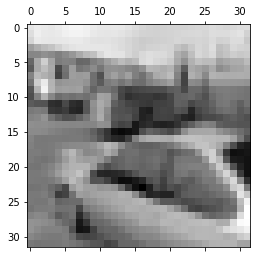

In [19]:
image = train_data[[49999, range(1024)]]
image = image.reshape((32, 32))
plt.matshow(image, cmap = 'gray')


In [20]:
##Skip for now: Try to get SVD to work:
# U, s, V = np.linalg.svd(image)
# S = np.zeros((image.shape[0], image.shape[1]))
# S[:image.shape[0], :image.shape[0]] = np.diag(s)
# n_component = 2
# S = S[:, :n_component]
# VT = V.transpose()
# VT = VT[:n_component, :]
# A = U.dot(s.dot(VT))
# print(A)

In [21]:
images_train = train_data_scaled.reshape(50000,3, 32, 32).transpose(0, 2, 3, 1)
#this is in order to split it into images, transpose is in order to order it in a way that tensorflow
#can use, ie (width, height, num_channel) = 32, 32,3
#images_train[5][12][22]

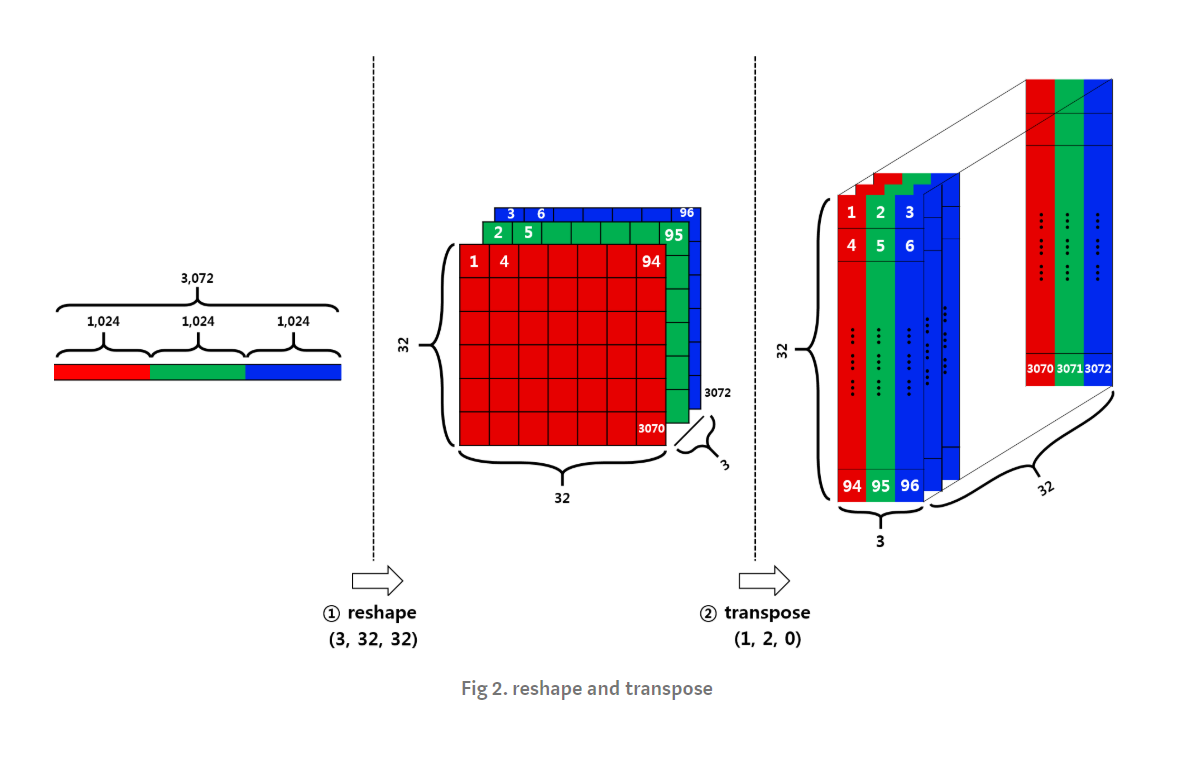

# Question 2

In [22]:
#try to implement logistic regress on dataset

#rename variables
x_train = train_data_scaled
x_test = test_data_scaled
x_test.shape
train_labels

x_train_pca = X_ipca
x_test_pca = ipca.transform(test_data_scaled)

In [23]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]])

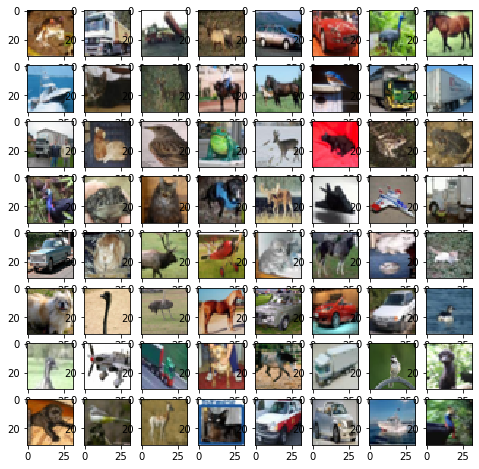

In [24]:
# plotting first 64 images
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()

## prediction using logistic regression

In [25]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_recall_fscore_support

In [26]:
## Training 
lr = LogisticRegression()
lr.fit(x_train_pca, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(test_labels, y_pred_lr)
logistic_regression_score

0.3199

# Prediction using KNN

In [28]:
## Training 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
## Predicting
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(test_labels, y_pred_knn)
knn_score

0.3371

# Predicting using SVM

In [30]:
## Training
svc = svm.SVC()
svc.fit(x_train_pca[range(10000),:], train_labels[range(10000),:])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
## Predicting 
y_pred_svm = svc.predict(x_test_pca[range(10000),:])
svc_score = accuracy_score(test_labels[range(10000),:], y_pred_svm)
svc_score

0.3352

## part 2) various metrics for models

In [32]:
print("K Nearest Neighbors accuracy: ", knn_score)
print("Logistic Regression accuracy: ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)

K Nearest Neighbors accuracy:  0.3371
Logistic Regression accuracy:  0.3199
Support Vector Classifier :  0.3352


In [33]:
print("K Nearest Neighbors averaged precision, recall, f1 score: ",
      precision_recall_fscore_support(test_labels, y_pred_knn, average='weighted'))
print("Logistic Regression averaged precision, recall, f1 score: ",
      precision_recall_fscore_support(test_labels, y_pred_lr, average='weighted'))
print("SVC averaged precision, recall, f1 score: ",
      precision_recall_fscore_support(test_labels, y_pred_svm, average='weighted'))

K Nearest Neighbors averaged precision, recall, f1 score:  (0.34355192236178544, 0.3371, 0.33506236069056716, None)
Logistic Regression averaged precision, recall, f1 score:  (0.30343124441364855, 0.3199, 0.30403157261588437, None)
SVC averaged precision, recall, f1 score:  (0.3497169988492555, 0.3352, 0.33668712763176256, None)


# Question 3

In [34]:
#clear some memory
train_data = []
test_data = []

# #Use sklearn ’s GridSearchCV and Pipeline features to go over
# these combinations for selecting the combination that gives the best f1 score averaged over 5
# folds (5-cross validation).

In [35]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# pipe = Pipeline(steps=[('pca', ipca), ('logistic', lr)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)
#X_digits = x_test
#y_digits = test_labels.reshape((1,-1))[0].shape


In [37]:
#y_digits.shape
#test_labels.reshape((1,-1))[0].shape
#X_digits.shape
# train_data_scaled.shape

In [38]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}

In [39]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.922):
{'logistic__C': 21.54434690031882, 'pca__n_components': 30}


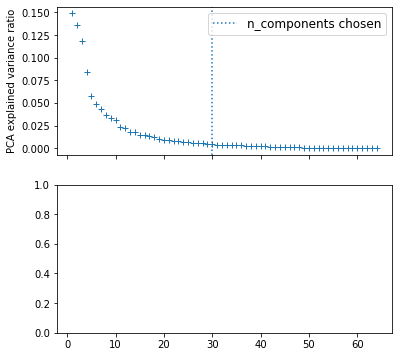

In [41]:
# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

In [43]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [53]:
## our variables are
#x_train_pca = X_ipca
#x_test_pca

# # Quantitative evaluation of the model quality on the test set
# X_test_pca = pca.transform(train_data_scaled)
# t0 = time()
# y_pred = search.predict(X_test_pca)